# ***PROBLEMA I***

In [1]:
!git clone https://github.com/fzamberlan/favaloro.git

Cloning into 'favaloro'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
fumadores = pd.read_csv("/content/favaloro/fumadores.csv")
fumadores.head()

,Sin stress,Con stress,Post tratamiento
0,15,20,15
1,31,45,9
2,30,48,10
3,16,30,14
4,10,20,14


# ***DEFINICIÓN DE VARIABLES***

In [4]:
sin_stress = fumadores["Sin stress"]
con_stress = fumadores["Con stress"]
post_tratamiento = fumadores["Post tratamiento"]

# ***A) B) T-TEST***

In [5]:
#GRUPOS INDEPENDIENTES
stats.ttest_ind(con_stress, sin_stress)

Ttest_indResult(statistic=6.736392015703182, pvalue=9.426884745773782e-09)

In [6]:
#GRUPOS DEPENDIENTES
stats.ttest_rel(con_stress, sin_stress)

Ttest_relResult(statistic=12.327324176329371, pvalue=7.874562696809275e-13)

# ***2) INTERPRETACIÓN DE DATOS OBTENIDOS - BOXPLOT***

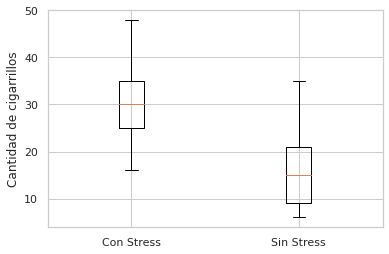

In [7]:
sns.set(style="whitegrid")
plt.boxplot([con_stress, sin_stress])
plt.xticks([1,2],["Con Stress", "Sin Stress"])
plt.ylabel("Cantidad de cigarrillos")
plt.show()

In [8]:
fumadores.describe()

,Sin stress,Con stress,Post tratamiento
count,29.000000,29.000000,29.000000
mean,16.413793,30.793103,9.482759
std,7.966525,8.286733,4.595189
min,6.000000,16.000000,1.000000
25%,9.000000,25.000000,6.000000
50%,15.000000,30.000000,10.000000
75%,21.000000,35.000000,14.000000
max,35.000000,48.000000,15.000000


# ***Interpretación:***

Nuestra H0 supone que las personas en períodos de stress no aumentan su consumo de cigarrillos. En cambio, la H1, supone que las personas en períodos de stress aumentan el consumo de cigarrillos.

El P-Valor obtenido se encuentra muy debajo del 0,05; por lo tanto, podemos rechazar la hipótesis nula.

A partir de los datos obtenidos, podemos negar que las personas en períodos de stress no aumentan el consumo de cigarrillos.

# ***PUNTO ADICIONAL***

# ***ANOVA***

In [9]:
stats.f_oneway(sin_stress, con_stress, post_tratamiento)

F_onewayResult(statistic=67.0764705882354, pvalue=3.90629435045719e-18)

# ***T-TEST***

In [10]:
stats.ttest_ind(sin_stress, con_stress)

Ttest_indResult(statistic=-6.736392015703182, pvalue=9.426884745773782e-09)

In [11]:
stats.ttest_ind(sin_stress, post_tratamiento)

Ttest_indResult(statistic=4.058447476945061, pvalue=0.00015477775417950616)

In [12]:
stats.ttest_ind(con_stress, post_tratamiento)

Ttest_indResult(statistic=12.11116316579629, pvalue=2.830450965065599e-17)

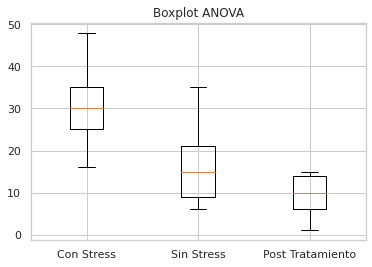

In [13]:
sns.set(style="whitegrid")
plt.boxplot([con_stress, sin_stress, post_tratamiento])
plt.xticks([1,2,3],["Con Stress", "Sin Stress", "Post Tratamiento"])
plt.title("Boxplot ANOVA")
plt.show()

# ***PROBLEMA II***

In [36]:
datos = pd.read_csv("/content/favaloro/datos_experimento.csv")
datos.head()

,Edad,Sexo,Educacion,Enfermedad,Ham-D,Apatia
0,48.0,M,12,2,29,6
1,65.0,M,9,2,14,2
2,70.0,M,10,2,19,5
3,54.0,F,12,3,13,5
4,65.0,F,6,2,2,0


In [15]:
datos.describe()

,Edad,Educacion,Enfermedad,Ham-D,Apatia
count,46.000000,50.000000,50.000000,50.000000,50.000000
mean,63.739130,10.800000,2.020000,8.640000,4.400000
std,10.153127,4.981599,0.820403,6.617108,3.083862
min,29.000000,0.000000,1.000000,0.000000,0.000000
25%,58.000000,6.000000,1.000000,3.250000,2.000000
50%,65.000000,12.000000,2.000000,7.000000,4.500000
75%,70.000000,14.000000,3.000000,12.000000,6.750000
max,85.000000,23.000000,3.000000,29.000000,11.000000


# ***1) ANOVA***

In [16]:
ApatiaEnfermedad1 = datos["Apatia"][datos["Enfermedad"]==1]
ApatiaEnfermedad2 = datos["Apatia"][datos["Enfermedad"]==2]
ApatiaEnfermedad3 = datos["Apatia"][datos["Enfermedad"]==3]

In [17]:
stats.f_oneway(ApatiaEnfermedad1, ApatiaEnfermedad2, ApatiaEnfermedad3)

F_onewayResult(statistic=4.57948717948718, pvalue=0.015238745741364324)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


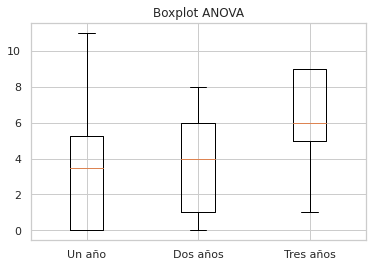

In [18]:
sns.set(style="whitegrid")
plt.boxplot([ApatiaEnfermedad1, ApatiaEnfermedad2, ApatiaEnfermedad3])
plt.xticks([1,2,3],["Un año", "Dos años", "Tres años"])
plt.title("Boxplot ANOVA")
plt.show()

# ***EDAD***

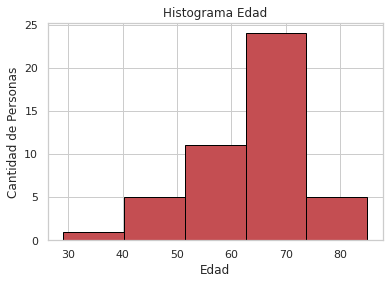

In [19]:
plt.hist(datos["Edad"], bins=5, edgecolor = "black", color="r")
plt.title("Histograma Edad")
plt.xlabel("Edad")
plt.ylabel('Cantidad de Personas')
plt.show()

# ***SEXO***

In [20]:
tabla_sexos = datos.groupby("Sexo").size()
print(tabla_sexos)

Sexo
F    25
M    25
dtype: int64


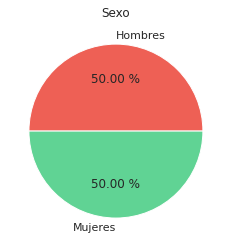

In [21]:
plt.pie(x=tabla_sexos, labels=["Hombres", "Mujeres"], autopct="%.2f %%", colors=["#EE6055","#60D394"])
plt.title("Sexo")
plt.show()

# ***AÑOS DE EDUCACIÓN***

In [22]:
educacion_promedio = datos["Educacion"].mean()
print("Promedio:", educacion_promedio)

Promedio: 10.8


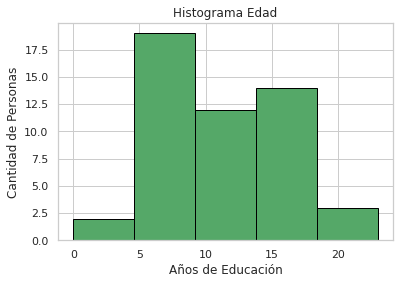

In [23]:
plt.hist(datos["Educacion"], bins=5, edgecolor = "black", color="g")
plt.title("Histograma Edad")
plt.xlabel("Años de Educación")
plt.ylabel('Cantidad de Personas')
plt.show()

# ***B) Planteo de Hipótesis nula e Hipótesis alternativa***

H0: Los cambios de ánimo (apatía) en los sujetos no se deben a la evolución temporal del Parkinson.

H1: En la medida que el Parkinson progresa, los sujetos presentan cambios en el ánimo (se vuelven más apáticos).

## ***C) Interpretar los resultados y explicar si se cumplen los supuestos***

Los P-Valores obtenidos se encuentran por debajo de 0,05; es decir, por debajo del %5. Por lo tanto, rechazamos la hipótesis nula.

A partir de estos datos, entendemos que a medida que el Parkinson progresa, los sujetos podrían presentar cambios en el estado de  ánimo (se vuelven más apáticos apáticos).

# ***D) T-TEST***

In [24]:
stats.ttest_ind(ApatiaEnfermedad1, ApatiaEnfermedad2)

Ttest_indResult(statistic=-0.027501924093044684, pvalue=0.9782356920213275)

In [25]:
stats.ttest_ind(ApatiaEnfermedad1, ApatiaEnfermedad3)

Ttest_indResult(statistic=-2.519707204728202, pvalue=0.017111771569263027)

In [26]:
stats.ttest_ind(ApatiaEnfermedad2, ApatiaEnfermedad3)

Ttest_indResult(statistic=-2.931705060472186, pvalue=0.006178983193091636)

# ***E) BOXPLOT***

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


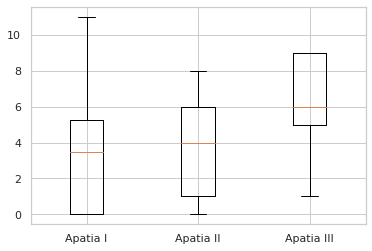

In [27]:
plt.boxplot([ApatiaEnfermedad1, ApatiaEnfermedad2, ApatiaEnfermedad3])
plt.xticks([1,2,3],["Apatia I", "Apatia II", "Apatia III"])
plt.show()

# ***PUNTO ADICIONAL***

# ***HAM-D***

In [28]:
HamDEnfermedad1 = datos["Ham-D"][datos["Enfermedad"]==1]
HamDEnfermedad2 = datos["Ham-D"][datos["Enfermedad"]==2]
HamDEnfermedad3 = datos["Ham-D"][datos["Enfermedad"]==3]

# ***ANOVA***

In [29]:
stats.f_oneway(HamDEnfermedad1, HamDEnfermedad2, HamDEnfermedad3)

F_onewayResult(statistic=0.15702015497457342, pvalue=0.8551333146858872)

# ***T-TEST***

In [30]:
stats.ttest_ind(HamDEnfermedad1, HamDEnfermedad2)

Ttest_indResult(statistic=-0.4878961938243757, pvalue=0.6290564568199699)

In [31]:
stats.ttest_ind(HamDEnfermedad1, HamDEnfermedad3)

Ttest_indResult(statistic=-0.47369876153997226, pvalue=0.6390339439651621)

In [32]:
stats.ttest_ind(HamDEnfermedad2, HamDEnfermedad3)

Ttest_indResult(statistic=0.10192530179265513, pvalue=0.9194519817890318)

# ***BOXPLOT***

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


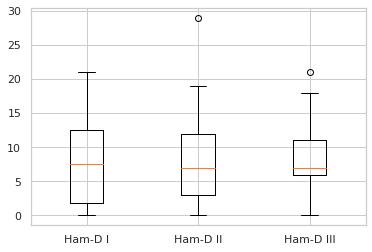

In [33]:
plt.boxplot([HamDEnfermedad1,HamDEnfermedad2, HamDEnfermedad3])
plt.xticks([1,2,3],["Ham-D I", "Ham-D II", "Ham-D III"])
plt.show()

# ***El P-Valor en los puntajes obtenidos de la escala de depresión de Hamilton***

Los P-Valor obtenido se son significativamente más altos que 0,05; es decir, representan más del %5.

La hipótesis nula en este caso sería que las personas que padecen la enfermedad de Parkinson, no contraen o incrementan su nivel de depresión. En este caso no se puede rechazar la hipótesis nula.